<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/jvcqp2iy2jlx2b32rmzdt0tx8lvxgzkp.png" width = 300, align = "center"></a>

<h1 align=center> <font size = 5> Exercise-Linear Regression with TensorFlow </font></h1>

This exercise is about modelling a linear relationship between "chirps of a cricket" and ground temperature. 

In 1948, G. W. Pierce in his book "Songs of Insects" mentioned that we can predict temperature by listening to the frequency of songs(chirps) made by stripped Crickets. He recorded change in behaviour of crickets by recording number of chirps made by them at several "different temperatures" and found that there is a pattern in the way crickets respond to the rate of change in ground temperature 60 to 100 degrees of farenhite. He also found out that Crickets did not sing   
above or below this temperature.

This data is derieved from the above mentioned book and aim is to fit a linear model and predict the "Best Fit Line" for the given "Chirps(per 15 Second)" in Column 'A' and the corresponding "Temperatures(Farenhite)" in Column 'B' using TensorFlow. So that one could easily tell what temperature it is just by listening to the songs of cricket. 



### Let's import tensorFlow and python dependencies 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Download and Explore the Data 

In [3]:

#downloading dataset
!wget -nv -O ../data/PierceCricketData.csv https://ibm.box.com/shared/static/fjbsu8qbwm1n5zsw90q6xzfo4ptlsw96.csv


df = pd.read_csv("../data/PierceCricketData.csv")
df.head()

2017-04-20 21:53:57 URL:https://public.boxcloud.com/d/1/6XAvi1mQbqb2l5Ch4TfRZFkzFv1utphV97LScjLoNv8uwNUUfROfwKzl6ZnGD-XYrmQncaFFH7xzkJekm1mZ5eMrOMqcFpz03U39DDJDYf4VX7NfScc-H8NHDjna9yY1agMDwqKYvEOhtX1voeWWvPhZt4PMUhbs48dcnjgofE7Hs_zvlx7rZIeJNYArLND1Lb05giPqAhafh5MFGAxMRszx9JfO85m6NTRLZz8PMZNXroz9ALxmTkMNz5SbQEbCYzQJlAFhdhkdcsaRfyc0Ew0MDimO5kVBggMzix-2Gr_1soJpacBry7nLG_5SmzJIQ-sL-o38NyEd-pk1ehXI63fz8hnyGAiFV9wOlxio5FieMYMrfQWctdxztc699FMzb8bcMweNDzC7I7DnJU5NyZI3nvayjYCKPoFhJm-dJ2ozYAvB86OagtK2vLznA3-PEDu88GeMJ5XFYzvKlb9mDTomkBlqQ3e-EdR-4FO2Z1kCN1vfKiaEBFYYx8szI3jGi18cc-8WtT7BoVcU-54L_dR_tSBBRcUpT-sAkeVPePIP3c_mPXMbKVwaMoPQi4d2ZTeUbQ-7bK_RrrTx8zUPZFf6jAPW3vmYh7G-ifg9jv25RRRRBAg8HFOPtKa9iQ_lVGU480gXxoRmEB_lPP7MXG7KballuaRE50zw0EHIEkTf5kSob_v9TCLxq0Lo8Ob9ntz5049-KTIsLr_EB9247hNzzeMC1iU3-Jk0Kz874WBXdHZ_Q5pFCncqni1OG7F6e_hJ3BD7Zv7v1k4WZJSua8cKHO67D1sv9zN8Gaj0X1ZftSVU8OxJqbFu54Xbkuw05k-giNgdkYvFc0Ekdv_L_0orCt6wZnh5wfryEktmkXKApUmijpsJM2pYC0hYnisiiUdLak48jGMjaWa0nsfxaxGIuH9Lj4M939yfO087jCVWZEBp

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


<h6> Plot the Data Points </h6>

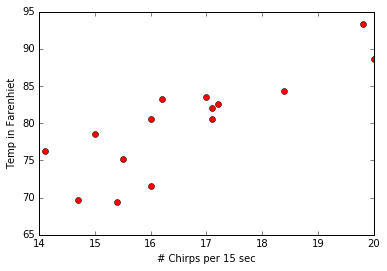

In [3]:

%matplotlib inline

x_data, y_data = (df["Chirps"].values,df["Temp"].values)

# plots the data points
plt.plot(x_data, y_data, 'ro')
# label the axis
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")


Looking at the scatter plot we can analyse that there is a linear relationship between the data points that connect chirps to the temperature and optimal way to infer this knowledge is by fitting a line that best describes the data. Which follows the linear equation: 

 ####                                          Ypred = m X + c 

We have to estimate the values of the slope 'm' and the inrtercept 'c' to fit a line where, X is the "Chirps" and Ypred is "Predicted Temperature" in this case. 


### Create a Data Flow Graph using TensorFlow 

Model the above equation by assigning arbitrary values of your choice for slope "m" and intercept "c" which can predict the temp "Ypred" given Chirps "X" as input. 

example m=3 and c=2

Also, create a place holder for actual temperature "Y" which we will be needing for Optimization to estimate the actual values of slope and intercept.


In [4]:
# Create place holders and Variables along with the Linear model.
m = tf.Variable(3, dtype=tf.float32)
c = tf.Variable(2, dtype=tf.float32)
x = tf.placeholder(dtype=tf.float32, shape=x_data.size)
y = tf.placeholder(dtype=tf.float32, shape=y_data.size)
# Linear model
y_pred = m * x + c

<div align="right">
<a href="#createvar" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="createvar" class="collapse">
```

X = tf.placeholder(tf.float32, shape=(x_data.size))
Y = tf.placeholder(tf.float32,shape=(y_data.size))

# tf.Variable call creates a  single updatable copy in the memory and efficiently updates 
# the copy to relfect any changes in the variable values through out the scope of the tensorflow session
m = tf.Variable(3.0)
c = tf.Variable(2.0)

# Construct a Model
Ypred = tf.add(tf.multiply(X, m), c)
```
</div>

###  Create and Run a Session to Visualize the Predicted Line from above Graph 

<h6> Feel free to change the values of "m" and "c" in future to check how the initial position of line changes </h6>


In [22]:
#create session and initialize variables
session = tf.Session()
session.run(tf.global_variables_initializer())

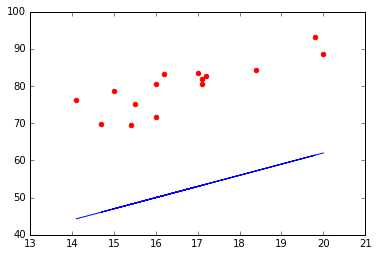

In [23]:

#get prediction with initial parameter values
y_vals = session.run(y_pred, feed_dict={x: x_data})
#Your code goes here
plt.plot(x_data, y_vals, label='Predicted')
plt.scatter(x_data, y_data, color='red', label='GT')

<div align="right">
<a href="#matmul1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="matmul1" class="collapse">
```

pred = session.run(Ypred, feed_dict={X:x_data})

#plot initial prediction against datapoints
plt.plot(x_data, pred)
plt.plot(x_data, y_data, 'ro')
# label the axis
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")


```
</div>

### Define a  Graph for Loss Function

The essence of estimating the values for "m" and "c" lies in minimizing the difference between predicted "Ypred" and actual "Y" temperature values which is defined in the form of Mean Squared error loss function. 
      
$$ loss = \frac{1}{n}\sum_{i=1}^n{[Ypred_i - {Y}_i]^2} $$

Note: There are also other ways to model the loss function based on distance metric between predicted and actual temperature values. For this exercise Mean Suared error criteria is considered. 


In [33]:
loss = tf.reduce_mean(tf.squared_difference(y_pred*0.1, y*0.1))

<div align="right">
<a href="#matmul12" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="matmul12" class="collapse">
```
# normalization factor
nf = 1e-1
# seting up the loss function
loss = tf.reduce_mean(tf.squared_difference(Ypred*nf,Y*nf))
```
</div>

### Define an Optimization Graph to Minimize the Loss and Training the Model





In [34]:
# Your code goes here
optimizer = tf.train.GradientDescentOptimizer(0.01)
train_op = optimizer.minimize(loss)

<div align="right">
<a href="#matmul13" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="matmul13" class="collapse">
```
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
#optimizer = tf.train.AdagradOptimizer(0.01 )

# pass the loss function that optimizer should optimize on.
train = optimizer.minimize(loss)

```
</div>

### Initialize all the vairiables again


In [35]:
session.run(tf.global_variables_initializer())

###  Run session to train and predict the values of 'm' and 'c' for different training steps along with storing the losses in each step

Get the predicted m and c values by running a session on Training a linear model. Also collect the loss for different steps to print and plot.  

In [36]:
convergenceTolerance = 0.0001
previous_m = np.inf
previous_c = np.inf

steps = {}
steps['m'] = []
steps['c'] = []

losses=[]

for k in range(10000):
    ########## Your Code goes Here ###########
    _, _l, _m, _c = session.run([train_op, loss, m, c], feed_dict={x: x_data, y: y_data})

    steps['m'].append(_m)
    steps['c'].append(_c)
    losses.append(_l)
    if (np.abs(previous_m - _m) or np.abs(previous_c - _c) ) <= convergenceTolerance :
        
        print "Finished by Convergence Criterion"
        print k
        print _l
        break
    previous_m = _m 
    previous_c = _c

Finished by Convergence Criterion
119
0.183721


<div align="right">
<a href="#matmul18" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="matmul18" class="collapse">
```
# run a session to train , get m and c values with loss function 
_, _m , _c,_l = session.run([train, m, c,loss],feed_dict={X:x_data,Y:y_data}) 

```
</div>

### Print the loss function

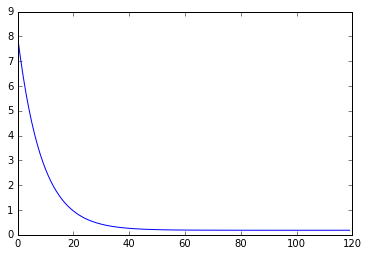

In [37]:
# Your Code Goes Here
plt.plot(losses)

<div align="right">
<a href="#matmul199" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="matmul199" class="collapse">
```
plt.plot(losses[:])

```
</div>

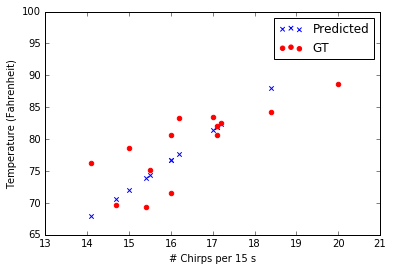

In [45]:
y_vals_pred = y_pred.eval(session=session, feed_dict={x: x_data})
plt.scatter(x_data, y_vals_pred, marker='x', color='blue', label='Predicted')
plt.scatter(x_data, y_data, label='GT', color='red')
plt.legend()
plt.ylabel('Temperature (Fahrenheit)')
plt.xlabel('# Chirps per 15 s')

In [46]:
session.close() 

This Exercise is about giving Overview about how to use TensorFlow for Predicting Ground Temperature given the number of Cricket Chirps per 15 secs. Idea is to use TnesorFlow's dataflow graph to define Optimization and Training graphs to find out the actual values of 'm' and 'c' that best describes the given Data. 


### Please Feel free to change the initial values of 'm' and 'c' to check how the training steps Vary. 




## Thank You for Completing this exercise 

Created by <a href = "https://ca.linkedin.com/in/shashibushan-yenkanchi"> Shashibushan Yenkanchi </a> </h4>


# REFERENCES

http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm